* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

In [1]:
from tensorflow.keras.utils import get_file
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [2]:
names = [
"edibility",
"cap-shape",
"cap-surface",
"cap-color",
"bruises?",
"odor",
"gill-attachment",
"gill-spacing",
"gill-size",
"gill-color",
"stalk-shape",
"stalk-root",
"stalk-surface-above-ring",
"stalk-surface-below-ring",
"stalk-color-above-ring",
"stalk-color-below-ring",
"veil-type",
"veil-color",
"ring-number",
"ring-type",
"spore-print-color",
"population",
"habitat"]
data = pd.read_csv(get_file("mushrooms_data.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"), names=names)
data.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
skb = SelectKBest(chi2, k=3)

y, X = data['edibility'], data.drop('edibility', axis='columns')
print("edibility shape:", y.shape)
print("rest shape:", X.shape)

data_x = pd.get_dummies(X)
data_y = pd.get_dummies(y)

print("rest dummies shape:", data_x.shape)
print("edibility dummies shape:", data_y.shape)

(8124,)
(8124, 22)
(8124, 117)
(8124, 2)


In [4]:
skb.fit(data_x,data_y) 
X_new = skb.transform(data_x)

In [5]:
np.array(data_x.columns)[skb.get_support(indices=True)]

array(['odor_f', 'odor_n', 'stalk-surface-above-ring_k'], dtype=object)

In [8]:
# Decomposing data to 3 dimensions
print("Original space:",data_x.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(data_x)
Xpca = pca.transform(data_x)

print("PCA space:", Xpca.shape)
print("Variance ratio: ", pca.explained_variance_ratio_)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(Xpca.shape[1])]
initial_feature_names = data_x.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(Xpca.shape[1])]
print("Features with most important variance: ", most_important_names)

Original space: (8124, 117)
PCA space: (8124, 3)
Variance ratio:  [0.16810879 0.13889755 0.09744943]
Features with most important variance:  ['ring-type_p', 'spore-print-color_h', 'habitat_d']


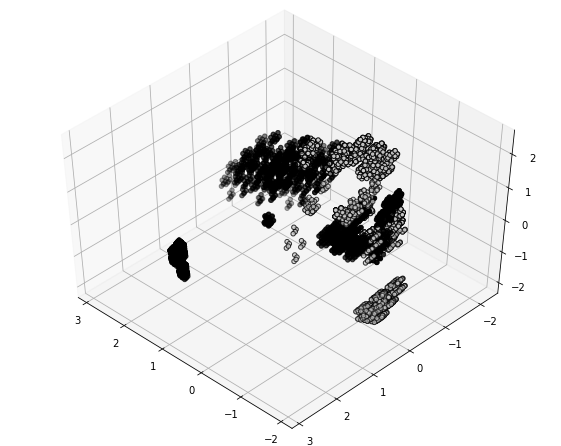

In [18]:
# Plotting original with the decomposed features
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

y_colors = [1 if p == 'e' else 0 for p in y]
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y_colors, cmap=plt.cm.nipy_spectral,
           edgecolor='k')